In [3]:
#formula y=b0​+b1​x+b2​x2+b3​x3+...+bn​xn

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error


In [13]:
data= pd.read_csv('polynomial_data.csv')
data

,x,y
0,-10.000000,-174.026287
1,-9.797980,-170.561264
2,-9.595960,-156.009529
3,-9.393939,-141.018477
4,-9.191919,-147.358466
...,...,...
95,9.191919,53.285741
96,9.393939,71.325581
97,9.595960,75.197039
98,9.797980,77.495649


In [15]:
import matplotlib.pyplot as plt

In [17]:
X = data[['x']]
y = data['y']

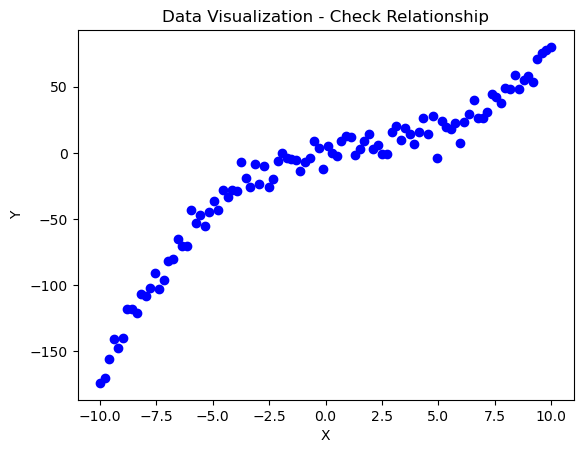

In [19]:
plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data Visualization - Check Relationship")
plt.show()


In [21]:
poly = PolynomialFeatures(degree=3)

In [31]:
xpoly=poly.fit_transform(X)
xpoly.shape

(100, 4)

In [35]:
model = LinearRegression()
model.fit(xpoly, y)


LinearRegression()

In [39]:
y_pred = model.predict(xpoly)
y_pred

array([-174.45615862, -166.43865869, -158.67621762, -151.16439327,
       -143.89874352, -136.87482623, -130.08819928, -123.53442053,
       -117.20904785, -111.10763912, -105.22575219,  -99.55894494,
        -94.10277525,  -88.85280097,  -83.80457998,  -78.95367014,
        -74.29562933,  -69.82601542,  -65.54038626,  -61.43429975,
        -57.50331373,  -53.74298608,  -50.14887468,  -46.71653738,
        -43.44153207,  -40.3194166 ,  -37.34574885,  -34.51608668,
        -31.82598797,  -29.27101059,  -26.8467124 ,  -24.54865127,
        -22.37238507,  -20.31347168,  -18.36746895,  -16.52993476,
        -14.79642699,  -13.16250349,  -11.62372214,  -10.1756408 ,
         -8.81381735,   -7.53380965,   -6.33117558,   -5.201473  ,
         -4.14025978,   -3.14309379,   -2.20553291,   -1.32313499,
         -0.49145791,    0.29394046,    1.03750226,    1.74366961,
          2.41688464,    3.06158949,    3.68222629,    4.28323716,
          4.86906424,    5.44414966,    6.01293555,    6.57986

In [41]:
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)


R² Score: 0.9851373915530671
Mean Squared Error: 49.43066875437659


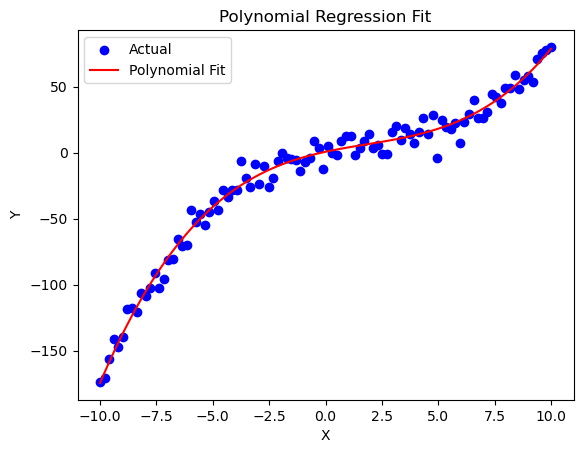

In [43]:
# Sort values for smooth curve
sorted_index = np.argsort(X.values.flatten())
X_sorted = X.values.flatten()[sorted_index]
y_pred_sorted = y_pred[sorted_index]

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()


In [45]:
# Example prediction
x_new = np.array([[5]])
x_new_poly = poly.transform(x_new)
y_new_pred = model.predict(x_new_poly)

print("Predicted Y for x=5:", y_new_pred[0])


Predicted Y for x=5: 18.16022486220062


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


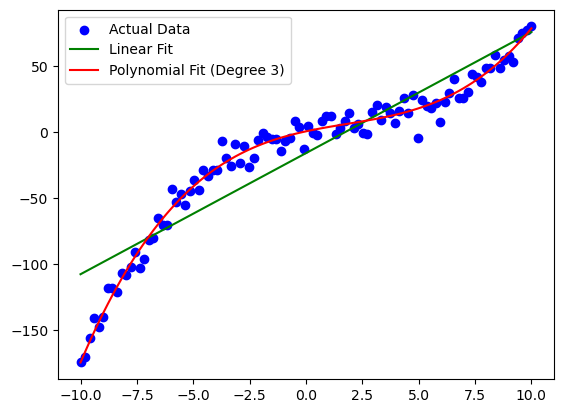

In [47]:
# Linear Model
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)

# Plot comparison
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_lin_pred, color='green', label='Linear Fit')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Fit (Degree 3)')
plt.legend()
plt.show()
